In [26]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [27]:
df = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/Batman/batman-chart_data-volume-days-pageTypes.csv")

In [28]:
df

,days,03/04/2022,03/05/2022,03/06/2022,03/07/2022,03/08/2022,03/09/2022,03/10/2022,03/11/2022,03/12/2022,...,05/31/2022,06/01/2022,06/02/2022,06/03/2022,06/04/2022,06/05/2022,06/06/2022,06/07/2022,06/08/2022,06/09/2022
0,Online News,1424,1009,1304,1373,748,839,833,409,474,...,228,112,125,152,110,695,191,269,494,190
1,QQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,YouTube,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Broadcast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Facebook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Legacy Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Tumblr,1409,2254,2700,2558,1965,1769,2275,1880,2243,...,364,478,342,169,226,192,226,173,205,179
7,Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,LinkedIn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Blogs,71,38,42,50,37,36,33,17,22,...,4,11,12,15,6,10,8,26,19,11


In [29]:
engagement = df.copy()

In [30]:
#Transpose Matrix
engagement = engagement.transpose()

In [31]:
#Creating df for Regression Analysis
reg_engagement = df.transpose().copy()

In [32]:
#Calculate Sum of engagements from each source
row_sums = engagement.sum(axis=1)

# Add row sums as a new column
engagement['total'] = row_sums
#engagement['total'] = engagement.iloc[:,6] #Only Forums

#Drop first Row containing all sources
engagement = engagement.drop(engagement.index[0])

#Drop all columns except the 'total' column
columns_to_keep = [engagement.columns[-1]]
engagement = engagement[columns_to_keep]

engagement.index.name = 'date'
engagement.index = pd.to_datetime(engagement.index)

In [33]:
engagement

,total
date,
2022-03-04,13269
2022-03-05,11651
2022-03-06,13144
2022-03-07,12332
2022-03-08,6040
...,...
2022-06-05,1253
2022-06-06,711
2022-06-07,856


In [34]:
bo = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/Batman/batman-bo.csv")

In [35]:
bo = bo.dropna(axis=1)

In [36]:
bo

,date,revenue,to_date
0,03/04/2022,"$56,608,349","$56,608,349"
1,03/05/2022,"$43,262,039","$99,870,388"
2,03/06/2022,"$34,138,236","$134,008,624"
3,03/07/2022,"$10,824,197","$144,832,821"
4,03/08/2022,"$10,772,573","$155,606,394"
...,...,...,...
93,06/05/2022,"$1,803","$369,342,756"
94,06/06/2022,$381,"$369,343,137"
95,06/07/2022,"$1,502","$369,344,639"
96,06/08/2022,$483,"$369,345,122"


In [37]:
#Fixing 'date' column
#bo['date'] = pd.to_datetime(bo['date'] + '-2021', format='%b-%d-%Y')

#bo['date'] = bo['date'].dt.strftime('%m/%d/%Y')

# Making 'date' the index of the DataFrame
bo.set_index('date', inplace=True)

#Remove $ value
bo['revenue'] = bo['revenue'].str.replace('$', '')
bo['revenue'] = bo['revenue'].str.replace(',', '')

In [38]:
bo

,revenue,to_date
date,,
03/04/2022,56608349,"$56,608,349"
03/05/2022,43262039,"$99,870,388"
03/06/2022,34138236,"$134,008,624"
03/07/2022,10824197,"$144,832,821"
03/08/2022,10772573,"$155,606,394"
...,...,...
06/05/2022,1803,"$369,342,756"
06/06/2022,381,"$369,343,137"
06/07/2022,1502,"$369,344,639"


In [39]:
engagement['total'] = pd.to_numeric(engagement['total'], errors='coerce')
bo['revenue'] = pd.to_numeric(bo['revenue'], errors='coerce')

In [40]:
engagement_ts = engagement.copy()
bo_ts = bo.copy()

In [41]:
engagement_ts

,total
date,
2022-03-04,13269
2022-03-05,11651
2022-03-06,13144
2022-03-07,12332
2022-03-08,6040
...,...
2022-06-05,1253
2022-06-06,711
2022-06-07,856


In [42]:
bo_ts.head(45)

,revenue,to_date
date,,
03/04/2022,56608349,"$56,608,349"
03/05/2022,43262039,"$99,870,388"
03/06/2022,34138236,"$134,008,624"
03/07/2022,10824197,"$144,832,821"
03/08/2022,10772573,"$155,606,394"
03/09/2022,8471060,"$164,076,454"
03/10/2022,8444372,"$172,520,826"
03/11/2022,18614979,"$191,135,805"
03/12/2022,28137360,"$219,273,165"


In [43]:
# Combine your datasets into a single DataFrame 
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

In [44]:
combined_df.head(66)

,total,revenue
date,,
2022-03-04,13269,56608349
2022-03-05,11651,43262039
2022-03-06,13144,34138236
2022-03-07,12332,10824197
2022-03-08,6040,10772573
...,...,...
2022-05-04,1040,55818
2022-05-05,1250,21926
2022-05-06,966,27507


In [45]:
#Making Data Stationary

#Differencing
#engagement_ts['total'] = engagement_ts['total'].diff()
#bo_ts['revenue'] = bo_ts['revenue'].diff()


#Taking Logarithm
#engagement_ts['total'] = np.log(engagement_ts['total'])
#bo_ts['revenue'] = bo_ts['revenue'].replace(-np.inf, np.nan)

# Dropping NA values after making it stationary
#engagement_ts.dropna(inplace=True)
#bo_ts.dropna(inplace=True)

In [46]:
#Checking Stationarity
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Example usage
check_stationarity(engagement_ts['total'])
check_stationarity(bo_ts['revenue'])

ADF Statistic: -4.601308
p-value: 0.000128
Critical Values:
	1%: -3.500
	5%: -2.892
	10%: -2.583
ADF Statistic: -6.589722
p-value: 0.000000
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585


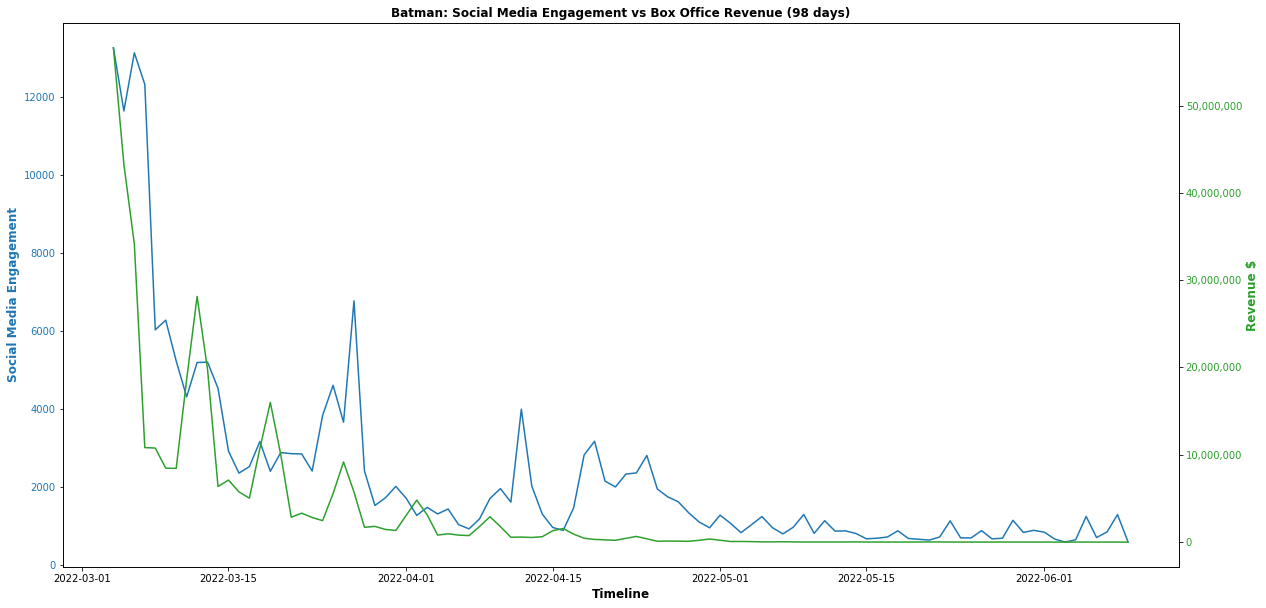

In [47]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:blue'
ax1.set_xlabel('Timeline',fontsize=12,fontweight='bold')
ax1.set_ylabel('Social Media Engagement',color=color,fontsize=12,fontweight='bold')
ax1.plot(combined_df.index,combined_df['total'],color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Revenue $',color=color,fontsize=12,fontweight='bold')
ax2.plot(combined_df.index, combined_df['revenue'],color=color)
ax2.tick_params(axis='y',labelcolor=color)

y_labels = ['{:,.0f}'.format(y) for y in plt.gca().get_yticks()]
plt.gca().set_yticklabels(y_labels)
plt.title('Batman: Social Media Engagement vs Box Office Revenue (98 days)',fontsize=12,fontweight='bold')

plt.grid(False)
plt.show()

In [48]:
correlation, _ = pearsonr(combined_df['total'], combined_df['revenue'])

In [49]:
print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: 0.8421243443432473


Maximum Pearson correlation coefficient: 0.8875405788134786
Lag associated with Maximum Pearson correlation coefficient: 1


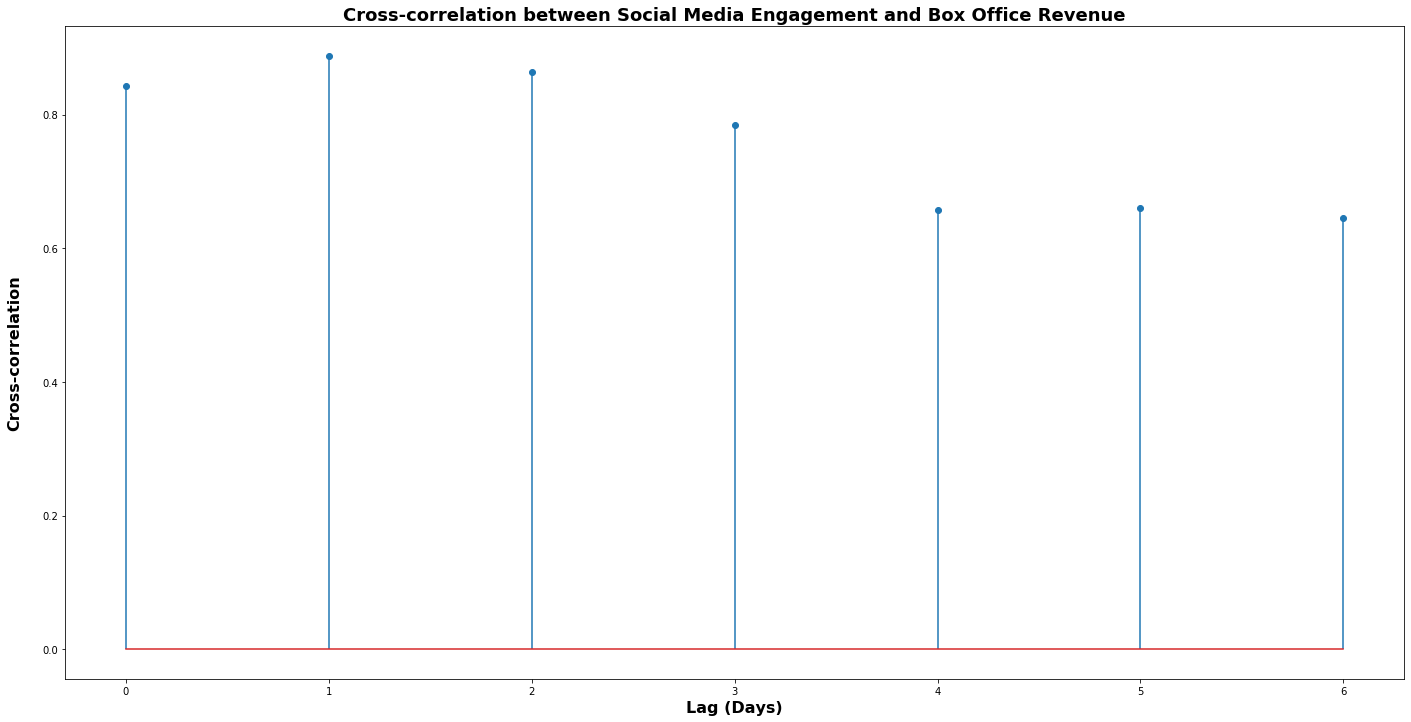

In [50]:
def cross_correlation(series1, series2, lag=0):
    return series1.corr(series2.shift(lag))

# Example usage:
lags = range(0, 7)  # Example lag values from 0 to 12
cross_corr_values = {}
for lag in lags:
    cross_corr_values[lag] = cross_correlation(combined_df['total'], combined_df['revenue'], lag)


max_pair = max(cross_corr_values.items(), key=lambda x: x[1])

#print(cross_corr_values.values())
#cross_corr_values = [cross_correlation(combined_df['total'], combined_df['revenue'], lag) for lag in lags]

print(f'Maximum Pearson correlation coefficient: {max_pair[1]}')
print(f'Lag associated with Maximum Pearson correlation coefficient: {max_pair[0]}')
# Plotting the cross-correlation values
import matplotlib
#matplotlib.use('TkAgg')  # Use TkAgg backend
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
plt.stem(lags, cross_corr_values.values(), use_line_collection=True)
plt.xlabel('Lag (Days)',fontsize=16,fontweight='bold')
plt.ylabel('Cross-correlation',fontsize=16,fontweight='bold',labelpad=20)
plt.title('Cross-correlation between Social Media Engagement and Box Office Revenue',fontsize=18,fontweight='bold')
plt.show()

In [51]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Combine your datasets into a single DataFrame for the Granger causality test
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

# Perform the Granger causality test
# The maxlag parameter is the maximum lag to test for, and the test 'ssr_chi2test' is one of the possible tests
granger_test_results = grangercausalitytests(combined_df, maxlag=10, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=38.4888 , p=0.0000  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=39.7172 , p=0.0000  , df=1
likelihood ratio test: chi2=33.2907 , p=0.0000  , df=1
parameter F test:         F=38.4888 , p=0.0000  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=25.0829 , p=0.0000  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=52.9222 , p=0.0000  , df=2
likelihood ratio test: chi2=42.1513 , p=0.0000  , df=2
parameter F test:         F=25.0829 , p=0.0000  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=11.8379 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=38.3388 , p=0.0000  , df=3
likelihood ratio test: chi2=32.2065 , p=0.0000  , df=3
parameter F test:         F=11.8379 , p=0.0000  , df_denom=88, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.4179  , p=0.0000  , df_d

In [52]:
#Linear Regression Fit
reg_engagement

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
days,Online News,QQ,YouTube,Broadcast,Facebook,Legacy Instagram,Tumblr,Instagram,LinkedIn,Blogs,Forums,Facebook Public,X,VK,Review,Reddit,4Chan
03/04/2022,1424,0,0,0,0,0,1409,0,0,71,998,0,9321,0,46,0,0
03/05/2022,1009,0,0,0,0,0,2254,0,0,38,750,0,7575,0,25,0,0
03/06/2022,1304,0,0,0,0,0,2700,0,0,42,721,0,8357,0,20,0,0
03/07/2022,1373,0,0,0,0,0,2558,0,0,50,574,0,7767,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06/05/2022,695,0,0,0,0,0,192,0,0,10,123,0,233,0,0,0,0
06/06/2022,191,0,0,0,0,0,226,0,0,8,120,0,165,0,1,0,0
06/07/2022,269,0,0,0,0,0,173,0,0,26,151,0,237,0,0,0,0
06/08/2022,494,0,0,0,0,0,205,0,0,19,123,0,455,0,4,0,0


In [53]:
#Make first row as Columns
reg_engagement.columns = reg_engagement.iloc[0]

In [54]:
#Drop first row
reg_engagement = reg_engagement.drop(reg_engagement.index[0])

In [55]:
#Drop Columns (Content Sources where all values are 0)
reg_engagement = reg_engagement.loc[:, (reg_engagement != 0).any(axis=0)]

In [56]:
reg_engagement = reg_engagement.rename(columns={'days': 'date'})

In [57]:
reg_engagement

days,Online News,Tumblr,Blogs,Forums,X,Review
03/04/2022,1424,1409,71,998,9321,46
03/05/2022,1009,2254,38,750,7575,25
03/06/2022,1304,2700,42,721,8357,20
03/07/2022,1373,2558,50,574,7767,10
03/08/2022,748,1965,37,439,2840,11
...,...,...,...,...,...,...
06/05/2022,695,192,10,123,233,0
06/06/2022,191,226,8,120,165,1
06/07/2022,269,173,26,151,237,0
06/08/2022,494,205,19,123,455,4


In [58]:
shift = -1 #Based on Lag

In [59]:
bo_series = bo['revenue']

In [60]:
bo_series

date
03/04/2022    56608349
03/05/2022    43262039
03/06/2022    34138236
03/07/2022    10824197
03/08/2022    10772573
                ...   
06/05/2022        1803
06/06/2022         381
06/07/2022        1502
06/08/2022         483
06/09/2022         461
Name: revenue, Length: 98, dtype: int64

In [61]:
bo_series_shifted = bo_series.shift(shift)

In [62]:
bo_series_shifted = bo_series_shifted[:shift]

In [63]:
bo_series_shifted

date
03/04/2022    43262039.0
03/05/2022    34138236.0
03/06/2022    10824197.0
03/07/2022    10772573.0
03/08/2022     8471060.0
                 ...    
06/04/2022        1803.0
06/05/2022         381.0
06/06/2022        1502.0
06/07/2022         483.0
06/08/2022         461.0
Name: revenue, Length: 97, dtype: float64

In [64]:
reg_engagement = reg_engagement.iloc[:shift, :]

In [65]:
reg_engagement

days,Online News,Tumblr,Blogs,Forums,X,Review
03/04/2022,1424,1409,71,998,9321,46
03/05/2022,1009,2254,38,750,7575,25
03/06/2022,1304,2700,42,721,8357,20
03/07/2022,1373,2558,50,574,7767,10
03/08/2022,748,1965,37,439,2840,11
...,...,...,...,...,...,...
06/04/2022,110,226,6,175,138,0
06/05/2022,695,192,10,123,233,0
06/06/2022,191,226,8,120,165,1
06/07/2022,269,173,26,151,237,0


In [66]:
reg_engagement = reg_engagement.astype(int)

In [67]:
reg_engagement

days,Online News,Tumblr,Blogs,Forums,X,Review
03/04/2022,1424,1409,71,998,9321,46
03/05/2022,1009,2254,38,750,7575,25
03/06/2022,1304,2700,42,721,8357,20
03/07/2022,1373,2558,50,574,7767,10
03/08/2022,748,1965,37,439,2840,11
...,...,...,...,...,...,...
06/04/2022,110,226,6,175,138,0
06/05/2022,695,192,10,123,233,0
06/06/2022,191,226,8,120,165,1
06/07/2022,269,173,26,151,237,0


In [68]:
bo_series_shifted

date
03/04/2022    43262039.0
03/05/2022    34138236.0
03/06/2022    10824197.0
03/07/2022    10772573.0
03/08/2022     8471060.0
                 ...    
06/04/2022        1803.0
06/05/2022         381.0
06/06/2022        1502.0
06/07/2022         483.0
06/08/2022         461.0
Name: revenue, Length: 97, dtype: float64

In [69]:
# Prepare the features (X) and the target (y)
X = reg_engagement  # 'Reg Engagement' df as features
y = bo_series_shifted  # 'Revenue' series

# Reset index if necessary
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the model (for the intercept)
X_scaled_with_const = sm.add_constant(X_scaled)

# Fit the OLS model
model = sm.OLS(y, X_scaled_with_const).fit()

# Get the regression report
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     30.58
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           9.48e-20
Time:                        13:32:05   Log-Likelihood:                -1613.2
No. Observations:                  97   AIC:                             3240.
Df Residuals:                      90   BIC:                             3258.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.224e+06   4.26e+05      7.569      

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [70]:
# Extract the coefficients (excluding the intercept) and sort them by their absolute values
coefficients = model.params.drop('const').abs().sort_values(ascending=False)

# Print the sorted coefficients to identify the top contributing features
print("\nTop Contributing Features:")
print(coefficients)


Top Contributing Features:
Review         3.372969e+06
Tumblr         1.332324e+06
Forums         1.044391e+06
X              6.833357e+05
Online News    9.071892e+04
Blogs          5.096888e+04
dtype: float64
